<a href="https://colab.research.google.com/github/srJboca/segmentacion/blob/main/EN/1.%20Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial: Exploring Customer and Gas Billing Data

## Introduction

Welcome to this tutorial on data exploration. We will work with a dataset that simulates information from a gas distribution company. The objective is to clean, combine, and explore this data to better understand customers, their consumption, and payment behaviors. This process is fundamental before performing more advanced tasks such as customer segmentation, predictive consumption modeling, or delinquency analysis.

The data is divided into four files:
1.  `clientes.parquet`: Information about customers (contracts, demographic data).
2.  `facturas.parquet`: Details of issued invoices (consumption, dates).
3.  `precios_gas.parquet`: Gas prices per m³ according to stratum, year, and month.
4.  `recaudo.parquet`: Information about payments made for the invoices.

## Phase 1: Environment Setup and Data Loading

### 1.1 Importing Libraries

First, we will import the necessary libraries.
* `pandas` for data manipulation and analysis.
* `matplotlib.pyplot` and `seaborn` for data visualization.
* `warnings` to manage any warnings that may arise.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Settings for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

### 1.2 Downloading the Data Files

We will download the Parquet files from the GitHub repository.

In [15]:
!wget -N https://github.com/srJboca/segmentacion/raw/refs/heads/main/archivos/clientes.parquet
!wget -N https://github.com/srJboca/segmentacion/raw/refs/heads/main/archivos/facturas.parquet
!wget -N https://github.com/srJboca/segmentacion/raw/refs/heads/main/archivos/precios_gas.parquet
!wget -N https://github.com/srJboca/segmentacion/raw/refs/heads/main/archivos/recaudo.parquet

--2025-06-13 13:50:31--  https://github.com/srJboca/segmentacion/raw/refs/heads/main/archivos/clientes.parquet
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/srJboca/segmentacion/refs/heads/main/archivos/clientes.parquet [following]
--2025-06-13 13:50:31--  https://raw.githubusercontent.com/srJboca/segmentacion/refs/heads/main/archivos/clientes.parquet
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2112389 (2.0M) [application/octet-stream]
Saving to: ‘clientes.parquet’

clientes.parquet    100%[===================>]   2.01M  --.-KB/s    in 0.08s   

Last-modified header missing -- time-stamps 

### 1.3 Loading Data into Pandas DataFrames

Now, we will load each Parquet file into a Pandas DataFrame.

In [16]:
df_clients = pd.read_parquet('clientes.parquet')
df_invoices = pd.read_parquet('facturas.parquet')
df_collections = pd.read_parquet('recaudo.parquet')
df_gas_prices = pd.read_parquet('precios_gas.parquet')

## Phase 2: Initial Data Inspection

We will perform a basic inspection of each DataFrame to understand its structure, data types, and check for null values or initial descriptive statistics.

### 2.1 Clients DataFrame (`df_clients`)

In [17]:
print("--- df_clients Information ---")
df_clients.info()
print("\n--- First 5 rows of df_clients ---")
print(df_clients.head())
print("\n--- Null values in df_clients ---")
print(df_clients.isnull().sum())
print("\n--- Descriptive statistics of df_clients ---")
print(df_clients.describe(include='all'))
print("\n--- Count of unique values per column in df_clients ---")
for col in df_clients.columns:
    print(f"Column '{col}': {df_clients[col].nunique()} unique values")

--- df_clients Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Numero de contrato                     50000 non-null  object
 1   Nombre                                 50000 non-null  object
 2   Direccion                              50000 non-null  object
 3   Ciudad                                 50000 non-null  object
 4   Estrato socioeconomico                 50000 non-null  object
 5   Fecha de Inicio del contrato           50000 non-null  object
 6   Fecha de la Ultima revision periodica  50000 non-null  object
dtypes: object(7)
memory usage: 2.7+ MB

--- First 5 rows of df_clients ---
                     Numero de contrato                 Nombre  \
0  ba70b7fa-aef4-492a-9d45-13a0c63ce47c      Nancy López Gómez   
1  ee662451-3660-4026-8ca0-497a05a6a141  Ximena Du

**Observations on `df_clients`:**
* Contains personal and contractual information of the clients.
* Columns like `Ciudad` and `Estrato socioeconomico` are categorical and could be important for segmentation.
* The date columns are object types; we will need to convert them to `datetime`.
* `Numero de contrato` appears to be the unique identifier.

### 2.2 Invoices DataFrame (`df_invoices`)

In [18]:
print("--- df_invoices Information ---")
df_invoices.info()
print("\n--- First 5 rows of df_invoices ---")
print(df_invoices.head())
print("\n--- Null values in df_invoices ---")
print(df_invoices.isnull().sum())
print("\n--- Descriptive statistics of df_invoices ---")
print(df_invoices.describe(include='all'))
print("\n--- Count of unique values per column in df_invoices ---")
for col in df_invoices.columns:
    print(f"Column '{col}': {df_invoices[col].nunique()} unique values")

--- df_invoices Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 9 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Numero de factura             object 
 1   Numero de contrato            object 
 2   Año                           int64  
 3   Mes                           int64  
 4   Fecha de Emision              object 
 5   Consumo (m3)                  float64
 6   Fecha de Pago Oportuno        object 
 7   Fecha de Lectura              object 
 8   Fecha de Suspension Estimada  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 206.0+ MB

--- First 5 rows of df_invoices ---
                      Numero de factura                    Numero de contrato  \
0  886199bb-77c8-43e2-86a0-a53348fa2706  ba70b7fa-aef4-492a-9d45-13a0c63ce47c   
1  caaac5c0-49fe-4c2a-991f-9e1483cf8d4d  ba70b7fa-aef4-492a-9d45-13a0c63ce47c   
2  6848b692-4212-4738-a35c-1f8c0d383e3d

**Observations on `df_invoices`:**
* Contains details of each invoice, including consumption and relevant dates.
* `Numero de factura` is the identifier for the invoice, and `Numero de contrato` links it to the client.
* `Consumo (m3)` is a key numerical variable.
* The date columns are also object types.

### 2.3 Collections DataFrame (`df_collections`)

In [19]:
print("--- df_collections Information ---")
df_collections.info()
print("\n--- First 5 rows of df_collections ---")
print(df_collections.head())
print("\n--- Null values in df_collections ---")
print(df_collections.isnull().sum())
print("\n--- Descriptive statistics of df_collections ---")
print(df_collections.describe(include='all'))
print("\n--- Count of unique values per column in df_collections ---")
for col in df_collections.columns:
    print(f"Column '{col}': {df_collections[col].nunique()} unique values")

--- df_collections Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 2 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Numero de factura   object
 1   Fecha de Pago Real  object
dtypes: object(2)
memory usage: 45.8+ MB

--- First 5 rows of df_collections ---
                      Numero de factura Fecha de Pago Real
0  886199bb-77c8-43e2-86a0-a53348fa2706         2021-01-15
1  caaac5c0-49fe-4c2a-991f-9e1483cf8d4d         2021-02-15
2  6848b692-4212-4738-a35c-1f8c0d383e3d         2021-03-16
3  ad91361e-9b8d-491e-bef9-e690e9b28faf         2021-04-05
4  e77f7ac6-734b-4856-a5c3-1a32d845e6b6         2021-05-11

--- Null values in df_collections ---
Numero de factura     0
Fecha de Pago Real    0
dtype: int64

--- Descriptive statistics of df_collections ---
                           Numero de factura Fecha de Pago Real
count                                3000000            3000000
unique      

**Observations on `df_collections`:**
* Records the date on which an invoice was paid.
* Joins with `df_invoices` using `Numero de factura`.
* `Fecha de Pago Real` will need conversion to `datetime`.

### 2.4 Gas Prices DataFrame (`df_gas_prices`)

In [20]:
print("--- df_gas_prices Information ---")
df_gas_prices.info()
print("\n--- First 5 rows of df_gas_prices ---")
print(df_gas_prices.head())
print("\n--- Null values in df_gas_prices ---")
print(df_gas_prices.isnull().sum())
print("\n--- Descriptive statistics of df_gas_prices ---")
print(df_gas_prices.describe(include='all'))
print("\n--- Count of unique values per column in df_gas_prices ---")
for col in df_gas_prices.columns:
    print(f"Column '{col}': {df_gas_prices[col].nunique()} unique values")

--- df_gas_prices Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Año              288 non-null    int64 
 1   Mes              288 non-null    int64 
 2   Estrato          288 non-null    object
 3   Precio m3 (COP)  288 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 9.1+ KB

--- First 5 rows of df_gas_prices ---
    Año  Mes    Estrato  Precio m3 (COP)
0  2021    1  Estrato 1              588
1  2021    1  Estrato 2              588
2  2021    1  Estrato 3              735
3  2021    1  Estrato 4              980
4  2021    1  Estrato 5             1176

--- Null values in df_gas_prices ---
Año                0
Mes                0
Estrato            0
Precio m3 (COP)    0
dtype: int64

--- Descriptive statistics of df_gas_prices ---
                Año         Mes    Estrato  Precio m3 (COP)
count    288.

**Observations on `df_gas_prices`:**
* Defines the price per m³ of gas according to `Año`, `Mes`, and `Estrato`.
* `Precio m3 (COP)` is the numerical price value.
* `Estrato` is categorical.

## Phase 3: Merging the Data

To get a consolidated view, we will combine these DataFrames.

### 3.1 Joining Invoices with Customer Information

We join `df_invoices` with `df_clients` using `Numero de contrato` as the key.

In [21]:
df_invoice_client = pd.merge(df_invoices, df_clients, on='Numero de contrato', how='left')
print("--- df_invoice_client Information (Invoices + Clients) ---")
df_invoice_client.info()
print("\n--- First 5 rows of df_invoice_client ---")
print(df_invoice_client.head())
print(f"\nShape of df_invoices: {df_invoices.shape}")
print(f"Shape of df_invoice_client: {df_invoice_client.shape}")

--- df_invoice_client Information (Invoices + Clients) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 15 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   Numero de factura                      object 
 1   Numero de contrato                     object 
 2   Año                                    int64  
 3   Mes                                    int64  
 4   Fecha de Emision                       object 
 5   Consumo (m3)                           float64
 6   Fecha de Pago Oportuno                 object 
 7   Fecha de Lectura                       object 
 8   Fecha de Suspension Estimada           object 
 9   Nombre                                 object 
 10  Direccion                              object 
 11  Ciudad                                 object 
 12  Estrato socioeconomico                 object 
 13  Fecha de Inicio del contrato           obje

**Verification:** The number of rows should be equal to that of `df_invoices` if each invoice has a corresponding customer (using `how='left'`). If it increases, it could indicate duplicates in `df_clients` by `Numero de contrato`, which should not happen.

### 3.2 Adding Prices to Invoices

Now we join `df_invoice_client` with `df_gas_prices`. The join is done using `Año`, `Mes`, and the customer's socioeconomic stratum.

In [22]:
df_invoice_client_price = pd.merge(df_invoice_client,
                                     df_gas_prices,
                                     left_on=['Año', 'Mes', 'Estrato socioeconomico'],
                                     right_on=['Año', 'Mes', 'Estrato'],
                                     how='left')

print("--- df_invoice_client_price Information (Invoices + Clients + Prices) ---")
df_invoice_client_price.info()
print("\n--- First 5 rows of df_invoice_client_price ---")
print(df_invoice_client_price.head())
print(f"\nShape of df_invoice_client: {df_invoice_client.shape}")
print(f"Shape of df_invoice_client_price: {df_invoice_client_price.shape}")

# Check for rows where the price could not be assigned (NaN in 'Precio m3 (COP)')
print("\n--- Rows without an assigned price ---")
print(df_invoice_client_price[df_invoice_client_price['Precio m3 (COP)'].isnull()].head())

--- df_invoice_client_price Information (Invoices + Clients + Prices) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100000 entries, 0 to 3099999
Data columns (total 17 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   Numero de factura                      object 
 1   Numero de contrato                     object 
 2   Año                                    int64  
 3   Mes                                    int64  
 4   Fecha de Emision                       object 
 5   Consumo (m3)                           float64
 6   Fecha de Pago Oportuno                 object 
 7   Fecha de Lectura                       object 
 8   Fecha de Suspension Estimada           object 
 9   Nombre                                 object 
 10  Direccion                              object 
 11  Ciudad                                 object 
 12  Estrato socioeconomico                 object 
 13  Fecha de Inicio del contrato

**Verification and Potential Issues:**
* Again, the number of rows should be consistent. If it increases drastically, it might indicate that the join keys `['Año', 'Mes', 'Estrato socioeconomico']` are not unique in `df_gas_prices` for a given combination, or that there are multiple invoices for the same client in the same month with the same stratum being mapped (which is expected).
* The `Estrato` column from `df_gas_prices` is redundant after the merge and can be dropped.
* It's crucial to check if there are any invoices to which a price could not be assigned. This could happen if a combination of `Año, Mes, Estrato socioeconomico` from the invoices does not exist in the price table.

### 3.3 Incorporating Payment Information (Collections)

Finally, we join the payment information from `df_collections`.

In [23]:
df_complete = pd.merge(df_invoice_client_price,
                       df_collections,
                       on='Numero de factura',
                       how='left') # We use a left join to keep all invoices, even if they don't have a recorded payment

print("--- df_complete Information (All data joined) ---")
df_complete.info()
print("\n--- First 5 rows of df_complete ---")
print(df_complete.head())
print(f"\nShape of df_invoice_client_price: {df_invoice_client_price.shape}")
print(f"Shape of df_complete: {df_complete.shape}")

# Check for invoices without an actual payment date
print("\n--- Invoices without actual payment date (NaN in 'Fecha de Pago Real') ---")
print(df_complete[df_complete['Fecha de Pago Real'].isnull()][['Numero de factura', 'Fecha de Emision', 'Fecha de Pago Oportuno']].head())

--- df_complete Information (All data joined) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100000 entries, 0 to 3099999
Data columns (total 18 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   Numero de factura                      object 
 1   Numero de contrato                     object 
 2   Año                                    int64  
 3   Mes                                    int64  
 4   Fecha de Emision                       object 
 5   Consumo (m3)                           float64
 6   Fecha de Pago Oportuno                 object 
 7   Fecha de Lectura                       object 
 8   Fecha de Suspension Estimada           object 
 9   Nombre                                 object 
 10  Direccion                              object 
 11  Ciudad                                 object 
 12  Estrato socioeconomico                 object 
 13  Fecha de Inicio del contrato           object 
 14  

**Verification:**
* The number of rows should remain the same or increase if an invoice has multiple payment records (uncommon, unless they are non-consolidated partial payments). A `left join` ensures all invoices are kept.
* Invoices without a corresponding `Fecha de Pago Real` will have `NaN` in that column. This is expected for unpaid invoices or those whose payment has not yet been recorded.

### 3.4 Column Selection and Handling Duplicates

The final analysis DataFrame will use a subset of columns. We will select these columns and then handle any potential duplicates that may have been generated during the merges, especially if the keys were not perfectly unique or if the same information was joined multiple times.

In [24]:
selected_columns = [
    'Numero de factura', 'Numero de contrato', 'Fecha de Emision', 'Consumo (m3)',
    'Fecha de Pago Oportuno', 'Fecha de Lectura', 'Fecha de Suspension Estimada',
    'Ciudad', 'Estrato socioeconomico',
    'Precio m3 (COP)', 'Fecha de Pago Real'
]

if 'Estrato' in df_complete.columns and 'Estrato socioeconomico' in df_complete.columns:
    df_complete = df_complete.drop(columns=['Estrato'])

# Create the analysis DataFrame with selected columns
df_analysis = df_complete[selected_columns].copy()

print("--- First rows of df_analysis (before handling duplicates) ---")
print(df_analysis.head())
print(f"\nShape of df_analysis before drop_duplicates: {df_analysis.shape}")

num_duplicates_before = df_analysis.duplicated().sum()
print(f"Number of exact duplicate rows before: {num_duplicates_before}")

df_analysis = df_analysis.drop_duplicates()
print(f"\nShape of df_analysis after drop_duplicates: {df_analysis.shape}")
num_duplicates_after = df_analysis.duplicated().sum()
print(f"Number of exact duplicate rows after: {num_duplicates_after}")

print("\n--- First rows of df_analysis (after handling duplicates) ---")
print(df_analysis.head())
df_analysis.info()

--- First rows of df_analysis (before handling duplicates) ---
                      Numero de factura                    Numero de contrato  \
0  886199bb-77c8-43e2-86a0-a53348fa2706  ba70b7fa-aef4-492a-9d45-13a0c63ce47c   
1  886199bb-77c8-43e2-86a0-a53348fa2706  ba70b7fa-aef4-492a-9d45-13a0c63ce47c   
2  caaac5c0-49fe-4c2a-991f-9e1483cf8d4d  ba70b7fa-aef4-492a-9d45-13a0c63ce47c   
3  6848b692-4212-4738-a35c-1f8c0d383e3d  ba70b7fa-aef4-492a-9d45-13a0c63ce47c   
4  ad91361e-9b8d-491e-bef9-e690e9b28faf  ba70b7fa-aef4-492a-9d45-13a0c63ce47c   

  Fecha de Emision  Consumo (m3) Fecha de Pago Oportuno Fecha de Lectura  \
0       2021-01-06         11.51             2021-01-19       2020-12-28   
1       2021-01-06         11.51             2021-01-19       2020-12-28   
2       2021-02-06          9.82             2021-02-16       2021-02-01   
3       2021-03-02         10.26             2021-03-17       2021-02-20   
4       2021-04-01         14.96             2021-04-11       2021-03-

**Note on Duplicates:**
The `drop_duplicates()` step is crucial to ensure the integrity of the analysis. It's important to investigate *why* duplicates were generated (e.g., non-unique merge keys? source data with duplicates?). For now, we have removed them.

## Phase 4: Feature Engineering

We will create new columns from existing ones to enrich our analysis.

### 4.1 Date Conversion

We convert the date columns to `datetime` format.

In [25]:
date_cols = ['Fecha de Emision', 'Fecha de Pago Oportuno', 'Fecha de Lectura', 'Fecha de Pago Real', 'Fecha de Suspension Estimada']
for col in date_cols:
    df_analysis[col] = pd.to_datetime(df_analysis[col], errors='coerce')

print("--- Data types after converting dates ---")
df_analysis.info()

--- Data types after converting dates ---
<class 'pandas.core.frame.DataFrame'>
Index: 3000000 entries, 0 to 3099999
Data columns (total 11 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   Numero de factura             object        
 1   Numero de contrato            object        
 2   Fecha de Emision              datetime64[ns]
 3   Consumo (m3)                  float64       
 4   Fecha de Pago Oportuno        datetime64[ns]
 5   Fecha de Lectura              datetime64[ns]
 6   Fecha de Suspension Estimada  datetime64[ns]
 7   Ciudad                        object        
 8   Estrato socioeconomico        object        
 9   Precio m3 (COP)               float64       
 10  Fecha de Pago Real            datetime64[ns]
dtypes: datetime64[ns](5), float64(2), object(4)
memory usage: 274.7+ MB


### 4.2 Calculating the Invoice Amount (Price per Consumption)

In [26]:
df_analysis['Price_per_Consumption'] = df_analysis['Precio m3 (COP)'] * df_analysis['Consumo (m3)']
print("\n--- df_analysis with 'Price_per_Consumption' ---")
print(df_analysis[['Consumo (m3)', 'Precio m3 (COP)', 'Price_per_Consumption']].head())


--- df_analysis with 'Price_per_Consumption' ---
   Consumo (m3)  Precio m3 (COP)  Price_per_Consumption
0         11.51            588.0                6767.88
2          9.82              NaN                    NaN
3         10.26            588.0                6032.88
4         14.96            637.0                9529.52
5         14.89            637.0                9484.93


### 4.3 Calculating Time Differences

We will calculate the number of days between different key events.

In [27]:
df_analysis['Days_Issue_DueDate'] = (df_analysis['Fecha de Pago Oportuno'] - df_analysis['Fecha de Emision']).dt.days
df_analysis['Days_Reading_Issue'] = (df_analysis['Fecha de Emision'] - df_analysis['Fecha de Lectura']).dt.days
df_analysis['Days_DueDate_ActualPayment'] = (df_analysis['Fecha de Pago Real'] - df_analysis['Fecha de Pago Oportuno']).dt.days

print("\n--- df_analysis with new days features ---")
print(df_analysis[['Fecha de Emision', 'Fecha de Pago Oportuno', 'Fecha de Lectura', 'Fecha de Pago Real',
                   'Days_Issue_DueDate', 'Days_Reading_Issue', 'Days_DueDate_ActualPayment']].head())


--- df_analysis with new days features ---
  Fecha de Emision Fecha de Pago Oportuno Fecha de Lectura Fecha de Pago Real  \
0       2021-01-06             2021-01-19       2020-12-28         2021-01-15   
2       2021-02-06             2021-02-16       2021-02-01         2021-02-15   
3       2021-03-02             2021-03-17       2021-02-20         2021-03-16   
4       2021-04-01             2021-04-11       2021-03-27         2021-04-05   
5       2021-05-10             2021-05-21       2021-05-05         2021-05-11   

   Days_Issue_DueDate  Days_Reading_Issue  Days_DueDate_ActualPayment  
0                  13                   9                          -4  
2                  10                   5                          -1  
3                  15                  10                          -1  
4                  10                   5                          -6  
5                  11                   5                         -10  


### 4.4 Identifying Late Payments

We create a binary column `Late_Payment`: 1 if the payment was made after the due date, 0 if it was paid on time or before. It is considered 0 if there is no actual payment date (NaT).

In [28]:
df_analysis['Late_Payment'] = 0
df_analysis.loc[df_analysis['Days_DueDate_ActualPayment'] > 0, 'Late_Payment'] = 1
df_analysis.loc[df_analysis['Days_DueDate_ActualPayment'].isnull(), 'Late_Payment'] = 0 # Assume not late if not paid yet

print("\n--- df_analysis with the 'Late_Payment' column ---")
print(df_analysis[['Fecha de Pago Oportuno', 'Fecha de Pago Real', 'Days_DueDate_ActualPayment', 'Late_Payment']].head(10))
print("\nValue counts in 'Late_Payment':")
print(df_analysis['Late_Payment'].value_counts(dropna=False))


--- df_analysis with the 'Late_Payment' column ---
   Fecha de Pago Oportuno Fecha de Pago Real  Days_DueDate_ActualPayment  \
0              2021-01-19         2021-01-15                          -4   
2              2021-02-16         2021-02-15                          -1   
3              2021-03-17         2021-03-16                          -1   
4              2021-04-11         2021-04-05                          -6   
5              2021-05-21         2021-05-11                         -10   
7              2021-06-19         2021-06-19                           0   
8              2021-07-19         2021-07-17                          -2   
9              2021-08-22         2021-08-15                          -7   
10             2021-09-15         2021-09-15                           0   
11             2021-10-17         2021-10-09                          -8   

    Late_Payment  
0              0  
2              0  
3              0  
4              0  
5              0

## Phase 5: Detailed Exploration of the Consolidated DataFrame (`df_analysis`)

Now that we have a clean and enriched DataFrame, we can explore it in more depth.

### 5.1 General Summary and Null Values

In [29]:
print("--- General information of df_analysis ---")
df_analysis.info()

print("\n--- Null values in df_analysis ---")
print(df_analysis.isnull().sum())

print("\n--- Descriptive statistics of df_analysis ---")
print(df_analysis.describe(include='all'))

--- General information of df_analysis ---
<class 'pandas.core.frame.DataFrame'>
Index: 3000000 entries, 0 to 3099999
Data columns (total 16 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   Numero de factura             object        
 1   Numero de contrato            object        
 2   Fecha de Emision              datetime64[ns]
 3   Consumo (m3)                  float64       
 4   Fecha de Pago Oportuno        datetime64[ns]
 5   Fecha de Lectura              datetime64[ns]
 6   Fecha de Suspension Estimada  datetime64[ns]
 7   Ciudad                        object        
 8   Estrato socioeconomico        object        
 9   Precio m3 (COP)               float64       
 10  Fecha de Pago Real            datetime64[ns]
 11  Price_per_Consumption         float64       
 12  Days_Issue_DueDate            int64         
 13  Days_Reading_Issue            int64         
 14  Days_DueDate_ActualPayment    int64         

**Observations on null values:**
* `Fecha de Suspension Estimada`: May have nulls if not all invoices have this date.
* `Precio m3 (COP)` and `Price_per_Consumption`: Nulls here would indicate problems in the merge with `df_gas_prices` or missing data in the price table.
* `Fecha de Pago Real` and `Days_DueDate_ActualPayment`: Nulls are expected for unpaid invoices.

It's important to decide how to handle these nulls. For some variables, they could be imputed; for others (like `Fecha de Pago Real`), their absence is informative.

### 5.2 Distribution of Key Numerical Variables

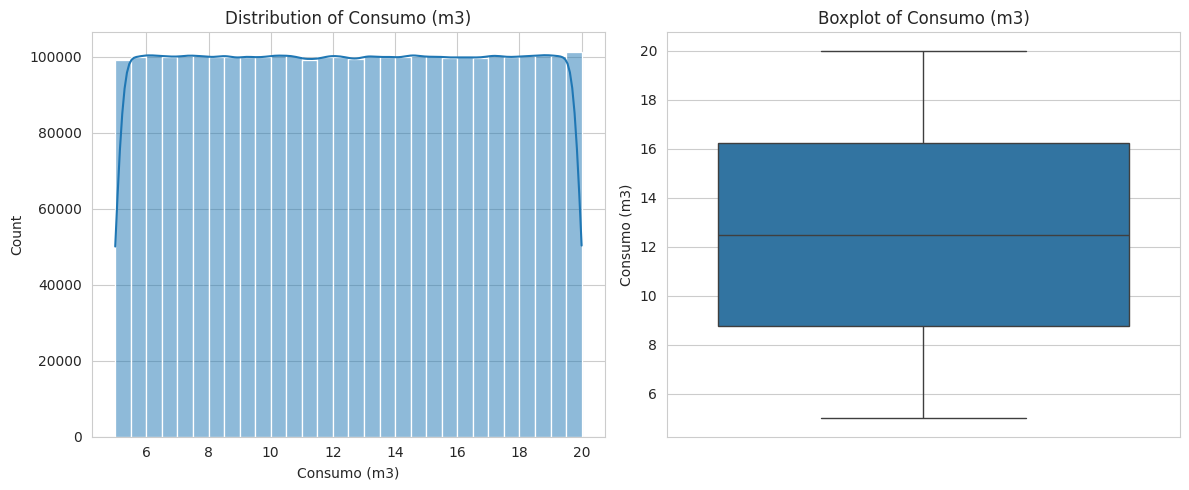

Statistics for Consumo (m3):
count    3.000000e+06
mean     1.250052e+01
std      4.332481e+00
min      5.000000e+00
25%      8.750000e+00
50%      1.250000e+01
75%      1.625000e+01
max      2.000000e+01
Name: Consumo (m3), dtype: float64



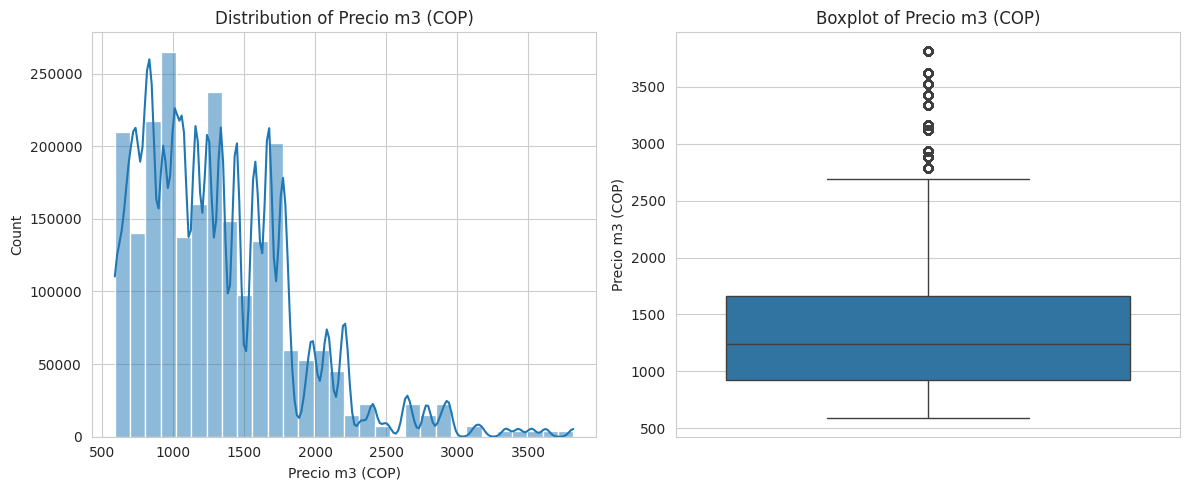

Statistics for Precio m3 (COP):
count    2.300000e+06
mean     1.318233e+03
std      5.461445e+02
min      5.880000e+02
25%      9.230000e+02
50%      1.240000e+03
75%      1.663000e+03
max      3.816000e+03
Name: Precio m3 (COP), dtype: float64



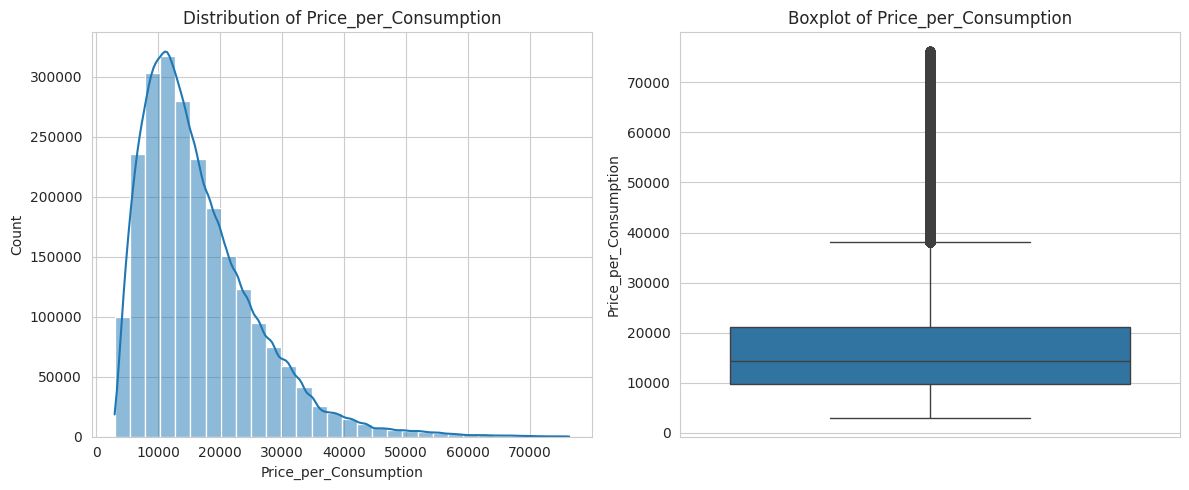

Statistics for Price_per_Consumption:
count    2.300000e+06
mean     1.647949e+04
std      9.214822e+03
min      2.940000e+03
25%      9.788380e+03
50%      1.437359e+04
75%      2.110142e+04
max      7.628184e+04
Name: Price_per_Consumption, dtype: float64



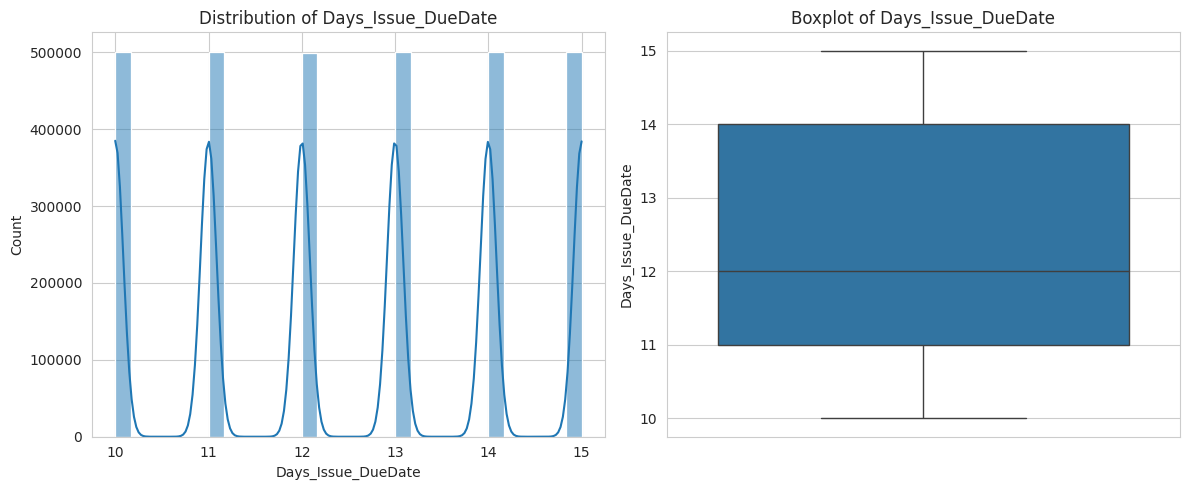

Statistics for Days_Issue_DueDate:
count    3.000000e+06
mean     1.249903e+01
std      1.708239e+00
min      1.000000e+01
25%      1.100000e+01
50%      1.200000e+01
75%      1.400000e+01
max      1.500000e+01
Name: Days_Issue_DueDate, dtype: float64



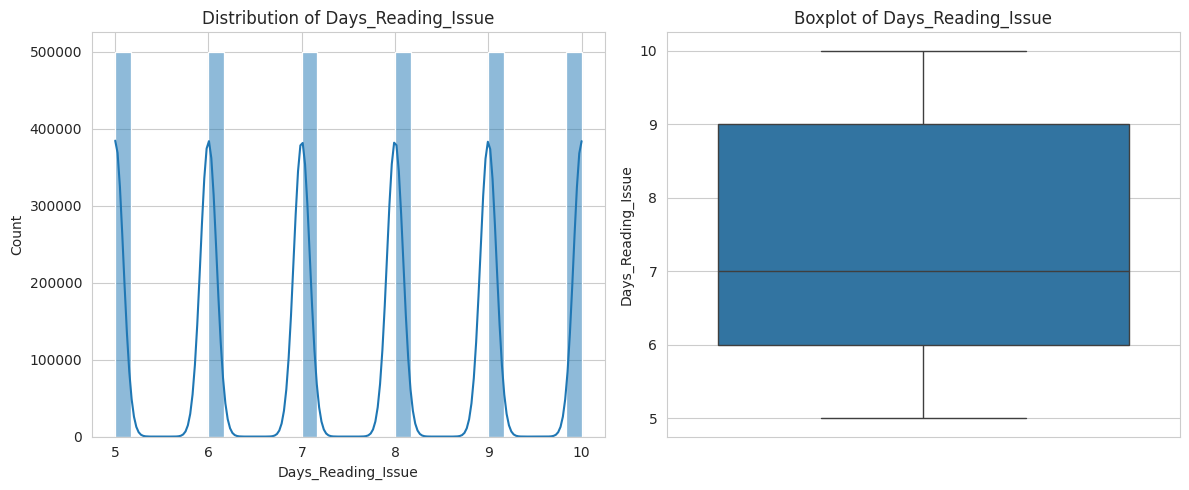

Statistics for Days_Reading_Issue:
count    3.000000e+06
mean     7.498845e+00
std      1.707785e+00
min      5.000000e+00
25%      6.000000e+00
50%      7.000000e+00
75%      9.000000e+00
max      1.000000e+01
Name: Days_Reading_Issue, dtype: float64



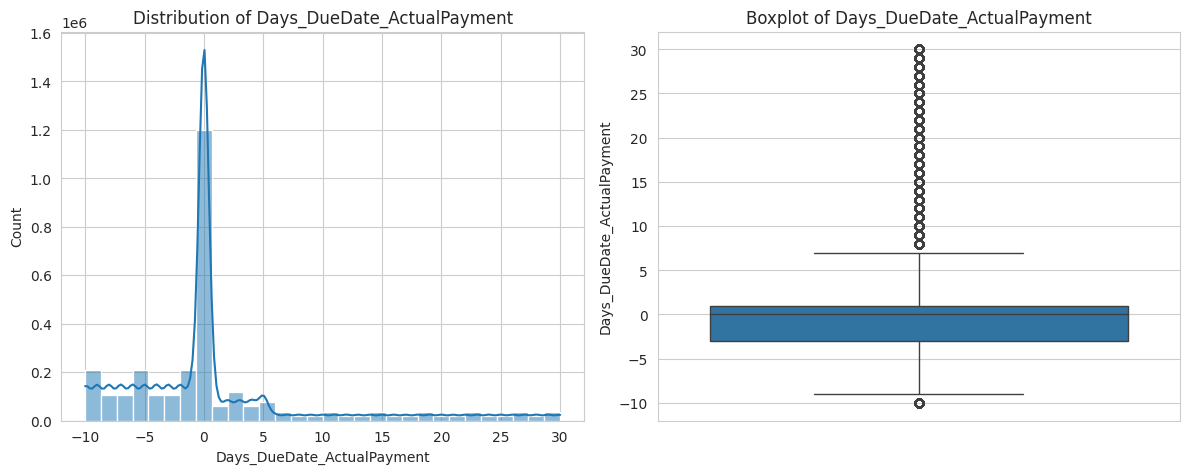

Statistics for Days_DueDate_ActualPayment:
count    3.000000e+06
mean     1.004112e+00
std      8.246973e+00
min     -1.000000e+01
25%     -3.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      3.000000e+01
Name: Days_DueDate_ActualPayment, dtype: float64



In [30]:
numerical_cols_to_plot = ['Consumo (m3)', 'Precio m3 (COP)', 'Price_per_Consumption',
                           'Days_Issue_DueDate', 'Days_Reading_Issue', 'Days_DueDate_ActualPayment']

for col in numerical_cols_to_plot:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df_analysis[col].dropna(), kde=True, bins=30) # dropna() to avoid errors with NaT/NaN in histplot
    plt.title(f'Distribution of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_analysis[col].dropna())
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()
    print(f"Statistics for {col}:\n{df_analysis[col].describe()}\n")

**Interpretation of distributions:**
* **Consumo (m3):** Observe the shape of the distribution. Is it symmetrical, skewed? Are there outliers (very high or low consumption)?
* **Precio m3 (COP):** Does it vary much? This will depend on the socioeconomic strata and temporal evolution.
* **Price_per_Consumption:** Similar to consumption, but scaled by price.
* **Days Variables:**
    * `Days_Issue_DueDate`: The time allowed for payment. Is it constant?
    * `Days_Reading_Issue`: Time between meter reading and invoice issuance. Is it consistent?
    * `Days_DueDate_ActualPayment`: Positive values indicate late payment. Negative values, early payment. Zero, payment on the due date. The boxplot can show the magnitude of the delay or advance.

### 5.3 Distribution of Key Categorical Variables

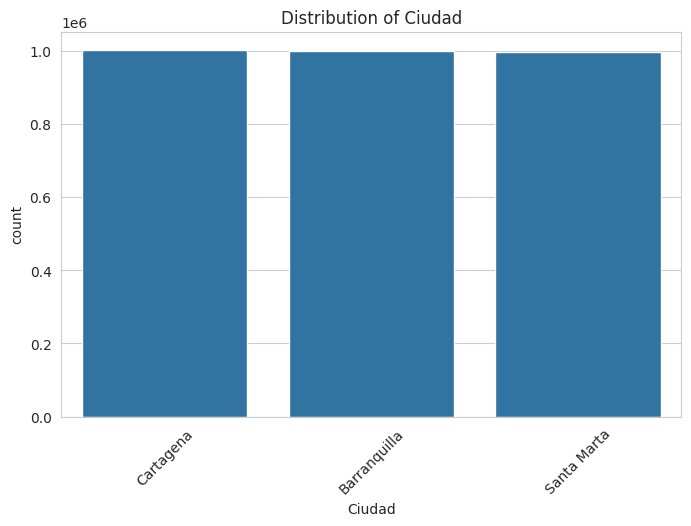

Counts for Ciudad:
Ciudad
Cartagena       1002300
Barranquilla    1000200
Santa Marta      997500
Name: count, dtype: int64



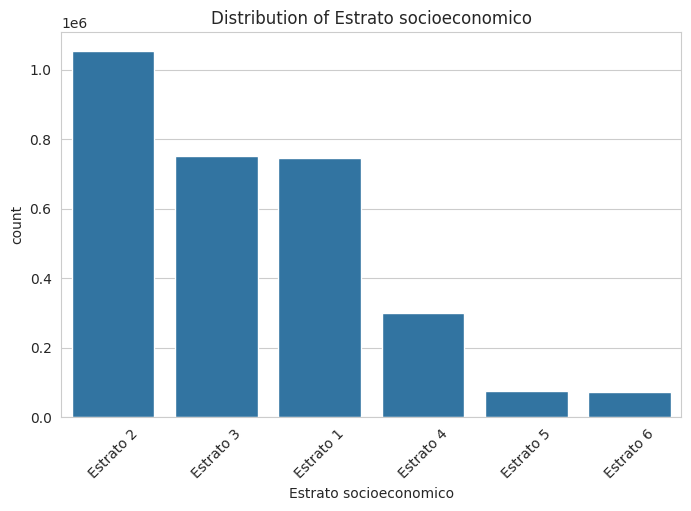

Counts for Estrato socioeconomico:
Estrato socioeconomico
Estrato 2    1055100
Estrato 3     751140
Estrato 1     745320
Estrato 4     300720
Estrato 5      75240
Estrato 6      72480
Name: count, dtype: int64



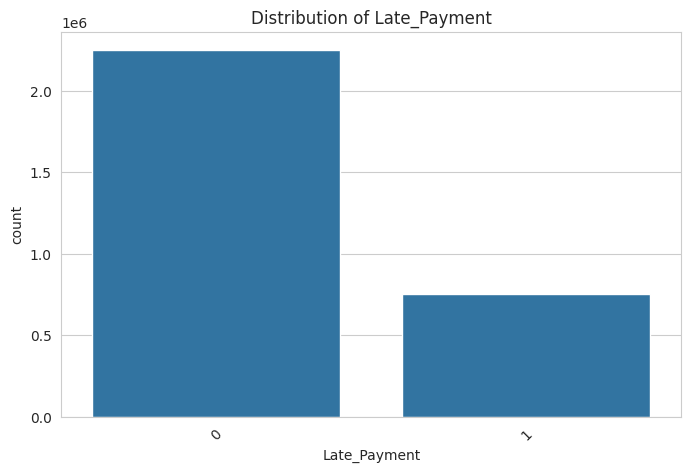

Counts for Late_Payment:
Late_Payment
0    2249271
1     750729
Name: count, dtype: int64



In [31]:
categorical_cols_to_plot = ['Ciudad', 'Estrato socioeconomico', 'Late_Payment']

for col in categorical_cols_to_plot:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_analysis, x=col, order=df_analysis[col].value_counts(dropna=False).index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()
    print(f"Counts for {col}:\n{df_analysis[col].value_counts(dropna=False)}\n")

**Interpretation of categorical distributions:**
* **Ciudad:** How are the invoices/customers distributed by city?
* **Estrato socioeconomico:** Which strata are the most common?
* **Late_Payment:** What proportion of invoices are paid late?

### 5.4 Correlation Analysis (Numerical Variables)

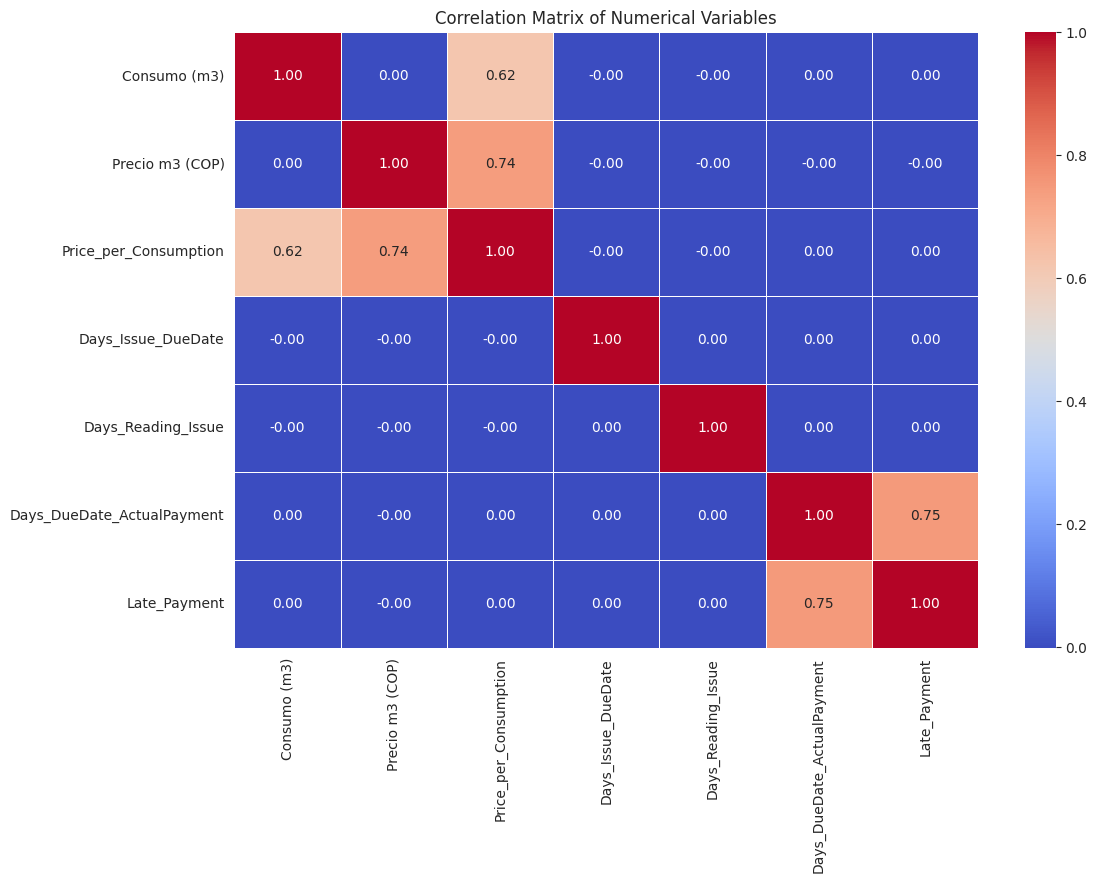


--- Pairs with highest (absolute) correlation ---
Days_DueDate_ActualPayment  Late_Payment             0.749306
Precio m3 (COP)             Price_per_Consumption    0.741759
Price_per_Consumption       Consumo (m3)             0.620050
dtype: float64


In [32]:
numerical_df = df_analysis.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

print("\n--- Pairs with highest (absolute) correlation ---")
corr_pairs = correlation_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort", ascending=False)
# Filter for relevance (> 0.5) and remove self-correlation and duplicates
unique_corr_pairs = sorted_pairs[(abs(sorted_pairs) < 1) & (abs(sorted_pairs) > 0.5)].drop_duplicates()
print(unique_corr_pairs.head(10))

**Interpretation of the Correlation Matrix:**
* Look for correlation coefficients close to 1 (strong positive correlation) or -1 (strong negative correlation).
* For example, a high correlation is expected between `Consumo (m3)` and `Price_per_Consumption`.
* Unexpected correlations can reveal interesting insights.

### 5.5 Relationships between Variables

Let's explore some specific relationships.

#### 5.5.1 Average Consumption by Stratum and City

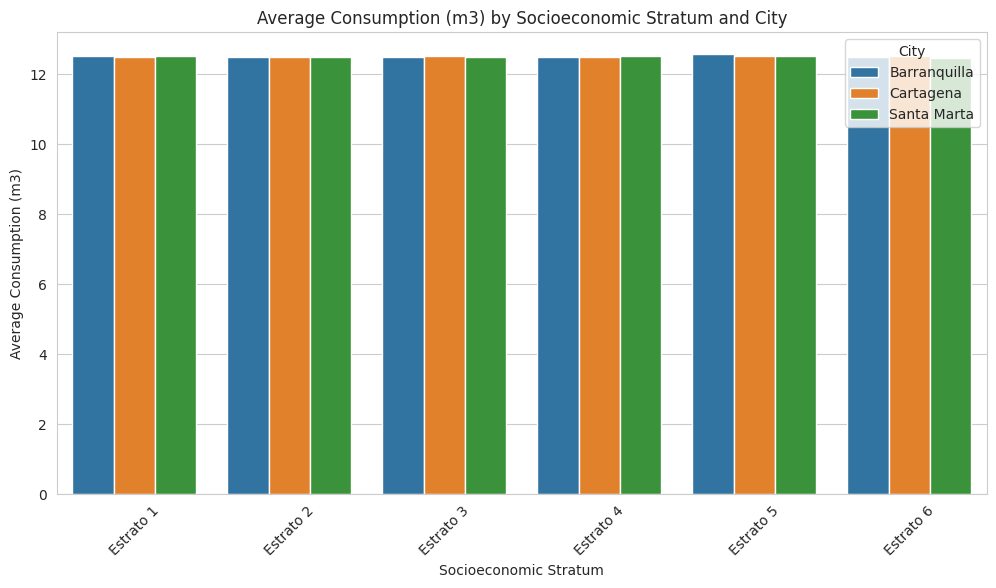

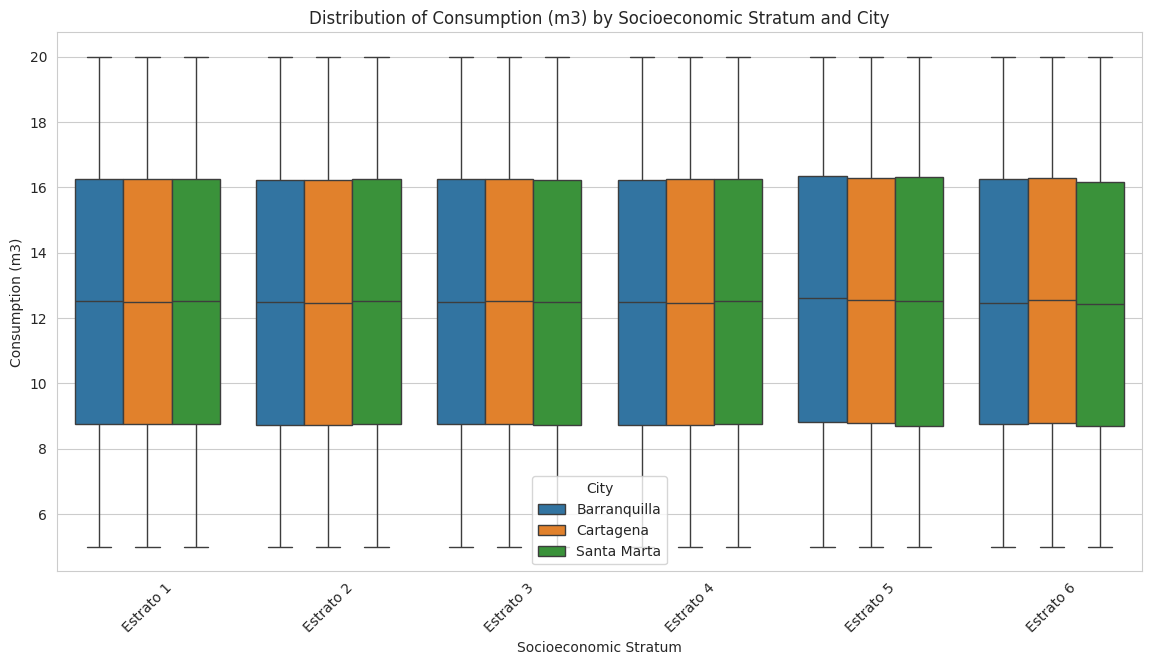

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_analysis, x='Estrato socioeconomico', y='Consumo (m3)', hue='Ciudad', estimator=pd.Series.mean, errorbar=None, order=sorted(df_analysis['Estrato socioeconomico'].dropna().unique()))
plt.title('Average Consumption (m3) by Socioeconomic Stratum and City')
plt.ylabel('Average Consumption (m3)')
plt.xlabel('Socioeconomic Stratum')
plt.xticks(rotation=45)
plt.legend(title='City')
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(data=df_analysis, x='Estrato socioeconomico', y='Consumo (m3)', hue='Ciudad', order=sorted(df_analysis['Estrato socioeconomico'].dropna().unique()))
plt.title('Distribution of Consumption (m3) by Socioeconomic Stratum and City')
plt.ylabel('Consumption (m3)')
plt.xlabel('Socioeconomic Stratum')
plt.xticks(rotation=45)
plt.legend(title='City')
plt.show()

#### 5.5.2 Late Payment Rate by Stratum and City

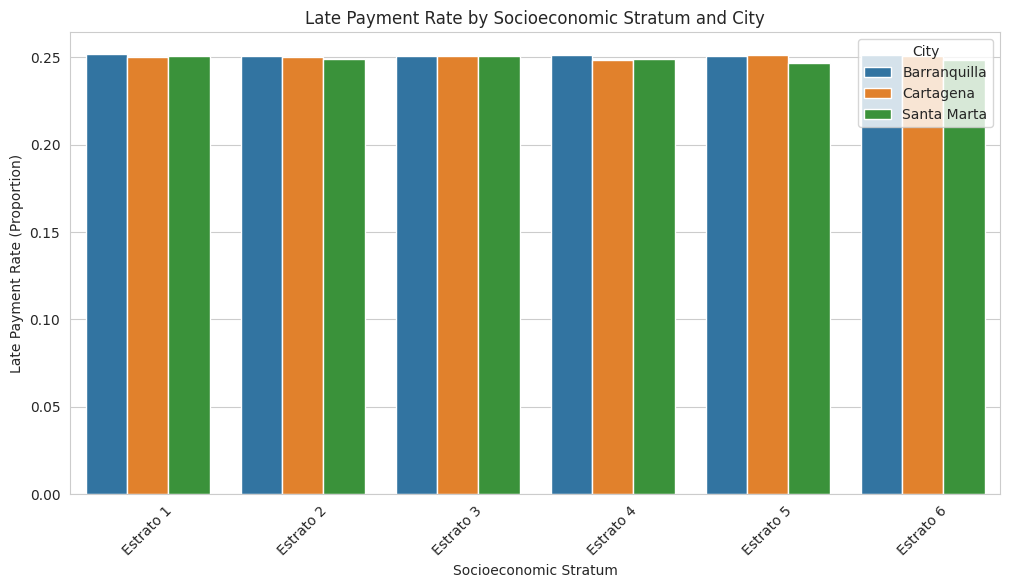

In [34]:
late_payment_by_stratum_city = df_analysis.groupby(['Estrato socioeconomico', 'Ciudad'])['Late_Payment'].mean().reset_index()
late_payment_by_stratum_city = late_payment_by_stratum_city.rename(columns={'Late_Payment': 'Late_Payment_Rate'})

plt.figure(figsize=(12, 6))
sns.barplot(data=late_payment_by_stratum_city, x='Estrato socioeconomico', y='Late_Payment_Rate', hue='Ciudad', order=sorted(late_payment_by_stratum_city['Estrato socioeconomico'].dropna().unique()))
plt.title('Late Payment Rate by Socioeconomic Stratum and City')
plt.ylabel('Late Payment Rate (Proportion)')
plt.xlabel('Socioeconomic Stratum')
plt.xticks(rotation=45)
plt.legend(title='City')
plt.show()

### 5.6 Temporal Analysis (Example: Consumption over time)

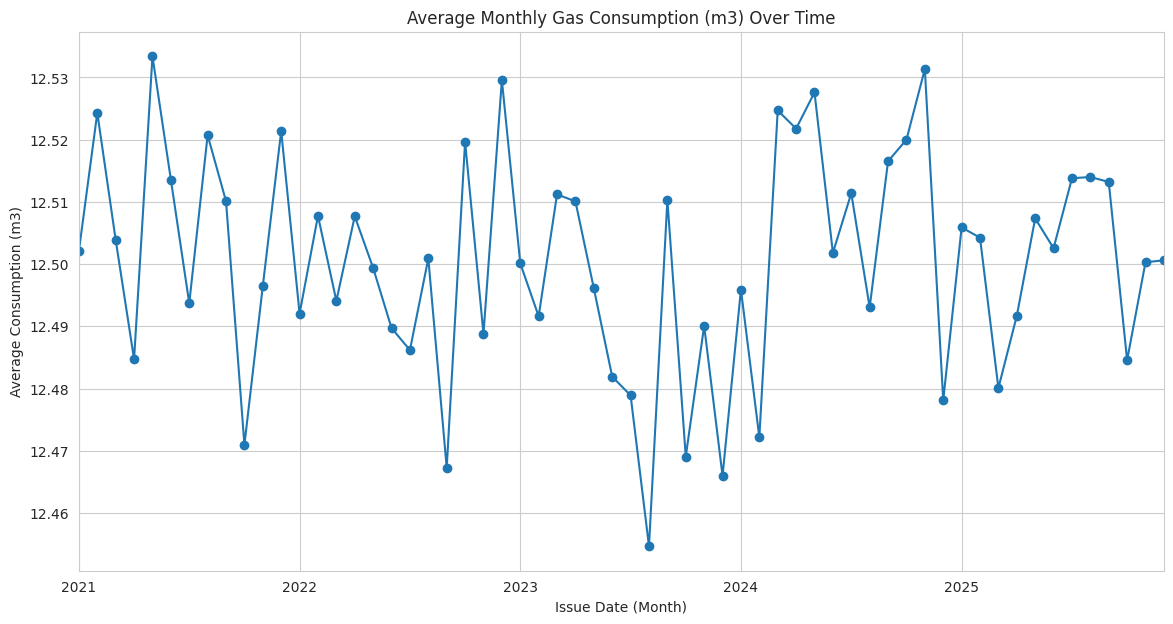

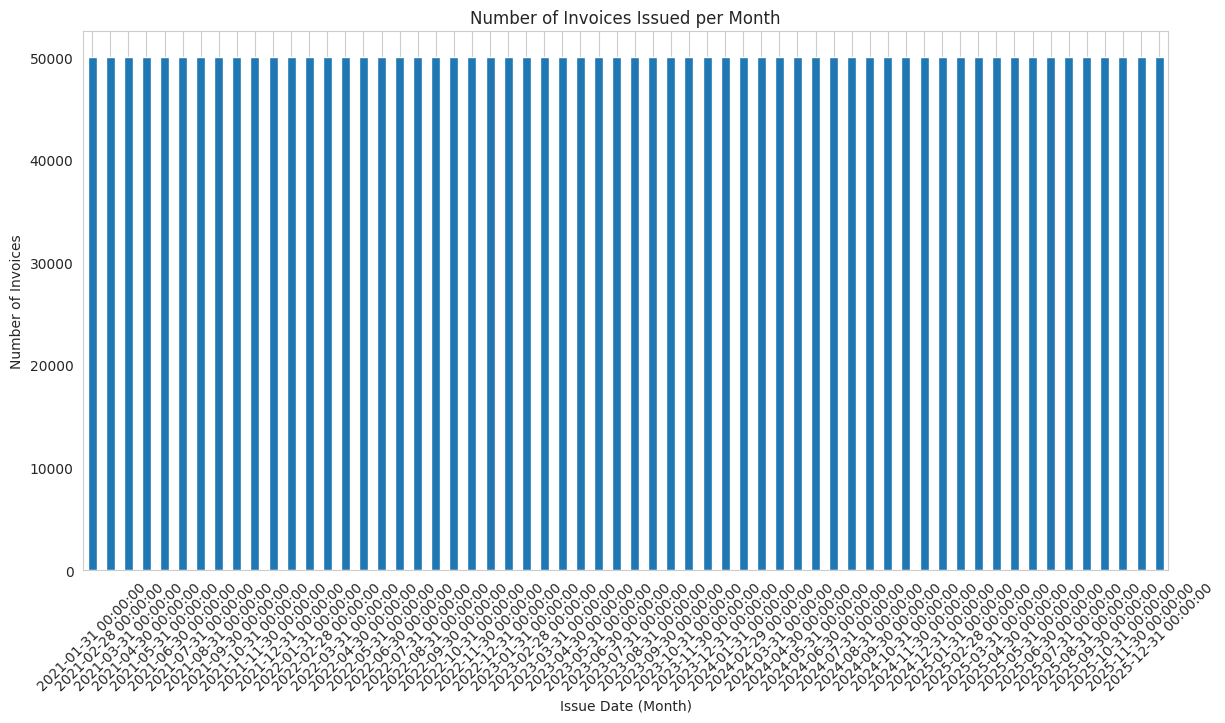

In [35]:
df_temporal = df_analysis.set_index('Fecha de Emision').sort_index()

monthly_consumption = df_temporal['Consumo (m3)'].resample('ME').mean()

plt.figure(figsize=(14, 7))
monthly_consumption.plot(marker='o', linestyle='-')
plt.title('Average Monthly Gas Consumption (m3) Over Time')
plt.xlabel('Issue Date (Month)')
plt.ylabel('Average Consumption (m3)')
plt.grid(True)
plt.show()

monthly_invoices = df_temporal.resample('ME').size()
plt.figure(figsize=(14, 7))
monthly_invoices.plot(kind='bar')
plt.title('Number of Invoices Issued per Month')
plt.xlabel('Issue Date (Month)')
plt.ylabel('Number of Invoices')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Interpretation of Temporal Analysis:**
* Are there trends in consumption (increase, decrease)?
* Is seasonality observed (peaks in certain months)?
* The number of invoices can indicate growth in the customer base or fluctuations in billing.

## Phase 6: Exploration Conclusions and Next Steps

In this exploratory phase, we have:
1.  Loaded and performed an initial inspection of four data sources.
2.  Combined the data into a unified DataFrame (`df_analysis`).
3.  Identified and handled duplicate rows that arose during merges.
4.  Performed feature engineering, creating new variables like `Price_per_Consumption`, time differences, and a `Late_Payment` indicator.
5.  Explored the distributions of key numerical and categorical variables.
6.  Analyzed correlations and relationships between variables (e.g., consumption by stratum, late payment by stratum).
7.  Conducted a brief temporal analysis of consumption.